In [ ]:
from google.colab import files
files.upload()  #  uploading kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"reebasabu","key":"0970a5c0db76c8516292c1b89030f0e9"}'}

In [ ]:
import os
import shutil

# Create the Kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the required directory
shutil.move("kaggle.json", "/root/.kaggle/")

# Set correct permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


Error: Destination path '/root/.kaggle/kaggle.json' already exists

In [ ]:
!kaggle datasets download -d tekbahadurkshetri/landslide4sense --unzip


Dataset URL: https://www.kaggle.com/datasets/tekbahadurkshetri/landslide4sense
License(s): other


In [ ]:
import pandas as pd

import numpy as np

import h5py

import glob

import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf

In [ ]:
import os

train_img_path = "/content/TrainData/img"

print("Is TrainData/img a directory?", os.path.isdir(train_img_path))
print("Does image_1.h5 exist?", os.path.isfile(os.path.join(train_img_path, "image_1.h5")))


Is TrainData/img a directory? True
Does image_1.h5 exist? True


In [ ]:
path_single = "/content/TrainData/img/image_1.h5"
path_single_mask = "/content/TrainData/mask/mask_1.h5"


Available keys in the HDF5 file: ['img']
Input data shape: (128, 128, 14)


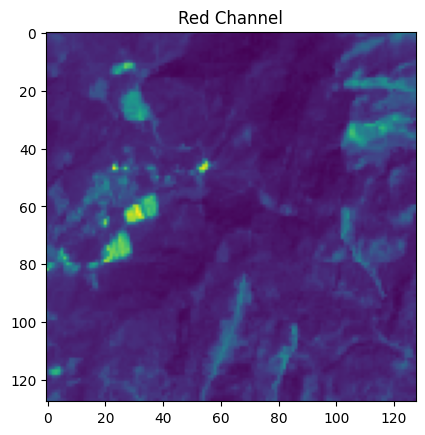

data_ndvi shape: (128, 128) f_data shape: (1, 128, 128, 3)


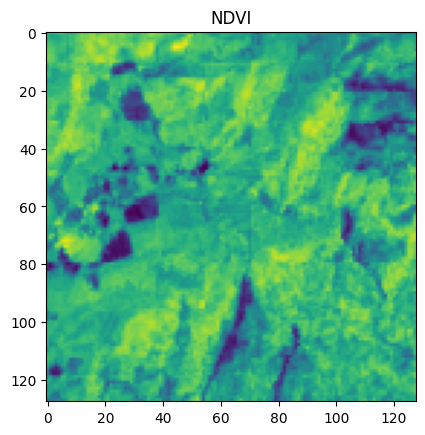

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# File paths
path_single = "/content/TrainData/img/image_1.h5"
path_single_mask = "/content/TrainData/mask/mask_1.h5"
f_data = np.zeros((1, 128, 128, 3))

# Open the HDF5 file
with h5py.File(path_single, 'r') as hdf:
    # Print keys in the HDF5 file
    ls = list(hdf.keys())
    print("Available keys in the HDF5 file:", ls)

    # Check if 'img' key exists
    if 'img' not in ls:
        raise KeyError("'img' key not found in HDF5 file")

    # Load the image data
    data = np.array(hdf.get('img'))
    print("Input data shape:", data.shape)

    # Check the shape to avoid indexing errors
    if data.shape[2] < 14:
        raise ValueError("The data has fewer than 14 channels. Shape:", data.shape)

    # Display a sample image (e.g., Red channel)
    plt.imshow(data[:, :, 3])  # Red channel (adjust as needed)
    plt.title("Red Channel")
    plt.show()

    # Extract specific bands for NDVI calculation
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]

    # Calculate NDVI (Normalized Difference Vegetation Index)
    data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red), where=(data_nir + data_red) != 0)

    # Store NDVI and other bands in f_data
    f_data[0, :, :, 0] = data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]
    print("data_ndvi shape:", data_ndvi.shape, "f_data shape:", f_data.shape)

    # Plot NDVI
    plt.imshow(data_ndvi, cmap='viridis')
    plt.title("NDVI")
    plt.show()

ls ['mask']
input data shape: (128, 128)


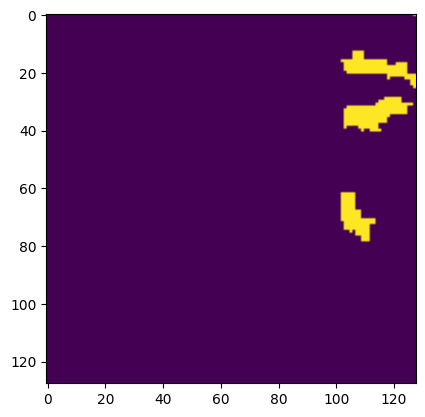

In [ ]:
with h5py.File(path_single_mask) as hdf:

    ls = list(hdf.keys())

    print("ls", ls)

    data = np.array(hdf.get('mask'))

    print("input data shape:", data.shape)

    plt.imshow(data)

In [ ]:
path_single = "/content/TrainData/img/image_1.h5"
path_single_mask = "/content/TrainData/mask/mask_1.h5"

TRAIN_PATH = "/content/TrainData/img/*.h5"
TRAIN_MASK = "/content/TrainData/mask/*.h5"



TRAIN_XX = np.zeros((3799, 128, 128, 6))

TRAIN_YY = np.zeros((3799, 128, 128, 1))

all_train = sorted(glob.glob(TRAIN_PATH))

all_mask = sorted(glob.glob(TRAIN_MASK))

In [ ]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):

    print(i, img, mask)

    with h5py.File(img) as hdf:

        ls = list(hdf.keys())

        data = np.array(hdf.get('img'))



        # assign 0 for the nan value

        data[np.isnan(data)] = 0.000001



        # to normalize the data

        mid_rgb = data[:, :, 1:4].max() / 2.0

        mid_slope = data[:, :, 12].max() / 2.0

        mid_elevation = data[:, :, 13].max() / 2.0



        # ndvi calculation

        data_red = data[:, :, 3]

        data_nir = data[:, :, 7]

        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))



        # final array

        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED

        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN

        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE

        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI

        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE

        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION





    with h5py.File(mask) as hdf:

        ls = list(hdf.keys())

        data=np.array(hdf.get('mask'))

        TRAIN_YY[i, :, :, 0] = data



0 /content/TrainData/img/image_1.h5 /content/TrainData/mask/mask_1.h5
1 /content/TrainData/img/image_10.h5 /content/TrainData/mask/mask_10.h5
2 /content/TrainData/img/image_100.h5 /content/TrainData/mask/mask_100.h5
3 /content/TrainData/img/image_1000.h5 /content/TrainData/mask/mask_1000.h5
4 /content/TrainData/img/image_1001.h5 /content/TrainData/mask/mask_1001.h5
5 /content/TrainData/img/image_1002.h5 /content/TrainData/mask/mask_1002.h5
6 /content/TrainData/img/image_1003.h5 /content/TrainData/mask/mask_1003.h5
7 /content/TrainData/img/image_1004.h5 /content/TrainData/mask/mask_1004.h5
8 /content/TrainData/img/image_1005.h5 /content/TrainData/mask/mask_1005.h5
9 /content/TrainData/img/image_1006.h5 /content/TrainData/mask/mask_1006.h5
10 /content/TrainData/img/image_1007.h5 /content/TrainData/mask/mask_1007.h5
11 /content/TrainData/img/image_1008.h5 /content/TrainData/mask/mask_1008.h5
12 /content/TrainData/img/image_1009.h5 /content/TrainData/mask/mask_1009.h5
13 /content/TrainData

<ipython-input-10-f13380172b3a>:49: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1671 /content/TrainData/img/image_2502.h5 /content/TrainData/mask/mask_2502.h5
1672 /content/TrainData/img/image_2503.h5 /content/TrainData/mask/mask_2503.h5
1673 /content/TrainData/img/image_2504.h5 /content/TrainData/mask/mask_2504.h5
1674 /content/TrainData/img/image_2505.h5 /content/TrainData/mask/mask_2505.h5
1675 /content/TrainData/img/image_2506.h5 /content/TrainData/mask/mask_2506.h5
1676 /content/TrainData/img/image_2507.h5 /content/TrainData/mask/mask_2507.h5
1677 /content/TrainData/img/image_2508.h5 /content/TrainData/mask/mask_2508.h5
1678 /content/TrainData/img/image_2509.h5 /content/TrainData/mask/mask_2509.h5
1679 /content/TrainData/img/image_251.h5 /content/TrainData/mask/mask_251.h5
1680 /content/TrainData/img/image_2510.h5 /content/TrainData/mask/mask_2510.h5
1681 /content/TrainData/img/image_2511.h5 /content/TrainData/mask/mask_2511.h5
1682 /content/TrainData/img/image_2512.h5 /content/TrainData/mask/mask_2512.h5
1683 /content/TrainData/img/image_2513.h5 /content/Tra

<ipython-input-10-f13380172b3a>:35: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2266 /content/TrainData/img/image_3038.h5 /content/TrainData/mask/mask_3038.h5
2267 /content/TrainData/img/image_3039.h5 /content/TrainData/mask/mask_3039.h5
2268 /content/TrainData/img/image_304.h5 /content/TrainData/mask/mask_304.h5
2269 /content/TrainData/img/image_3040.h5 /content/TrainData/mask/mask_3040.h5
2270 /content/TrainData/img/image_3041.h5 /content/TrainData/mask/mask_3041.h5
2271 /content/TrainData/img/image_3042.h5 /content/TrainData/mask/mask_3042.h5
2272 /content/TrainData/img/image_3043.h5 /content/TrainData/mask/mask_3043.h5
2273 /content/TrainData/img/image_3044.h5 /content/TrainData/mask/mask_3044.h5
2274 /content/TrainData/img/image_3045.h5 /content/TrainData/mask/mask_3045.h5
2275 /content/TrainData/img/image_3046.h5 /content/TrainData/mask/mask_3046.h5
2276 /content/TrainData/img/image_3047.h5 /content/TrainData/mask/mask_3047.h5
2277 /content/TrainData/img/image_3048.h5 /content/TrainData/mask/mask_3048.h5
2278 /content/TrainData/img/image_3049.h5 /content/Tra

In [ ]:

TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001

print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


In [ ]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

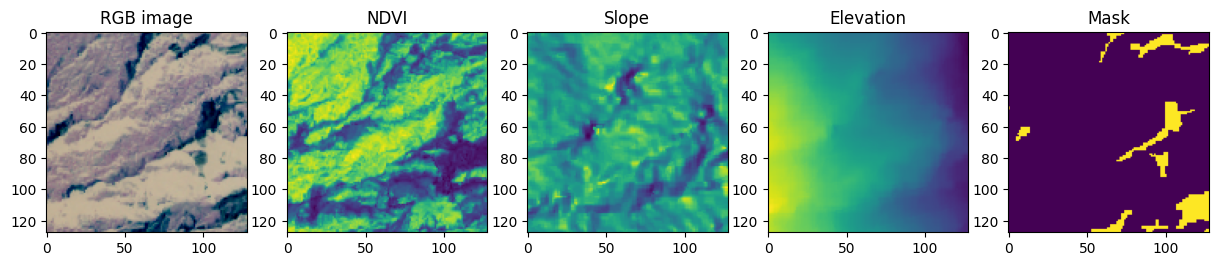

In [ ]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

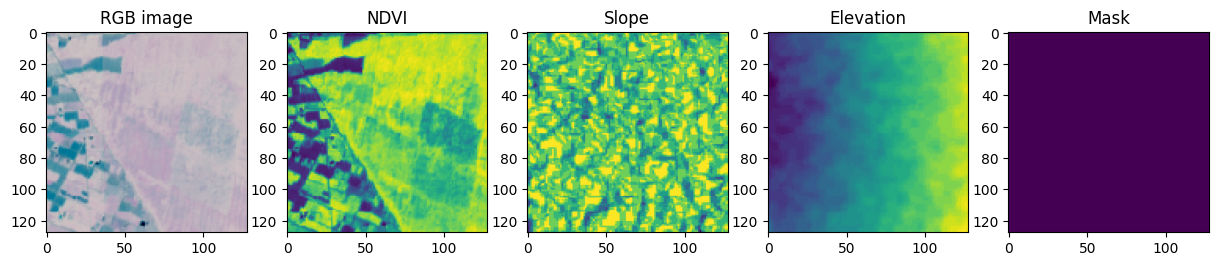

In [ ]:
img=150
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [ ]:

x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [ ]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask

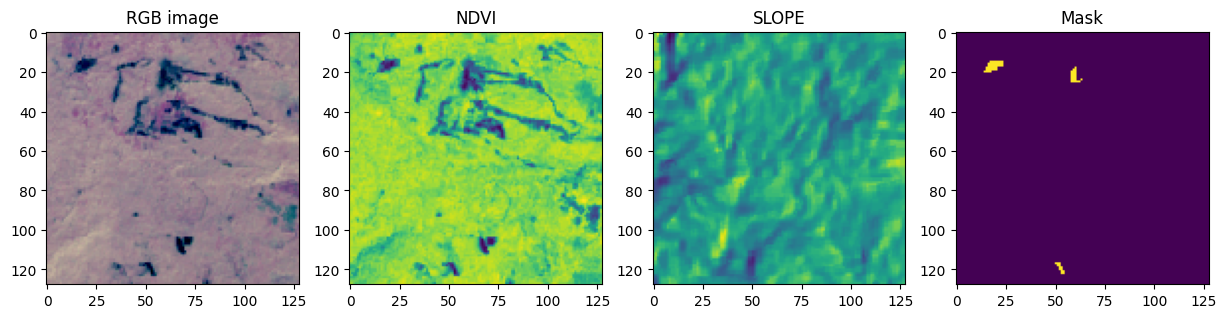

In [ ]:

img=200
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose, Activation, BatchNormalization

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


def conv_block(input_tensor, num_filters):
    # First convolution
    x = Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolution
    x = Conv2D(num_filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    return x

def unet_plus_plus(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Downsampling path
    # Level 1
    x1_0 = conv_block(inputs, 64)
    p1 = MaxPooling2D((2, 2))(x1_0)

    # Level 2
    x2_0 = conv_block(p1, 128)
    p2 = MaxPooling2D((2, 2))(x2_0)

    # Level 3
    x3_0 = conv_block(p2, 256)
    p3 = MaxPooling2D((2, 2))(x3_0)

    # Level 4
    x4_0 = conv_block(p3, 512)
    p4 = MaxPooling2D((2, 2))(x4_0)

    # Bottleneck
    x5_0 = conv_block(p4, 1024)

    # Upsampling path with dense skip connections
    # Level 4
    u4_1 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(x5_0)
    x4_1 = concatenate([u4_1, x4_0])
    x4_1 = conv_block(x4_1, 512)

    u3_1 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x4_0)
    x3_1 = concatenate([u3_1, x3_0])
    x3_1 = conv_block(x3_1, 256)

    u2_1 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x3_0)
    x2_1 = concatenate([u2_1, x2_0])
    x2_1 = conv_block(x2_1, 128)

    # Level 3
    u3_2 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x4_1)
    x3_2 = concatenate([u3_2, x3_0, x3_1])
    x3_2 = conv_block(x3_2, 256)

    u2_2 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x3_1)
    x2_2 = concatenate([u2_2, x2_0, x2_1])
    x2_2 = conv_block(x2_2, 128)

    # Level 2
    u2_3 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x3_2)
    x2_3 = concatenate([u2_3, x2_0, x2_1, x2_2])
    x2_3 = conv_block(x2_3, 128)

    # Final upsampling
    u1_1 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x2_1)
    x1_1 = concatenate([u1_1, x1_0])
    x1_1 = conv_block(x1_1, 64)

    u1_2 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x2_2)
    x1_2 = concatenate([u1_2, x1_0, x1_1])
    x1_2 = conv_block(x1_2, 64)

    u1_3 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x2_3)
    x1_3 = concatenate([u1_3, x1_0, x1_1, x1_2])
    x1_3 = conv_block(x1_3, 64)

    # Output
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(x1_3)

    model = Model(inputs=inputs, outputs=outputs)

    return model

def dice_coefficient(y_true, y_pred):
    smooth = 1.
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def bce_dice_loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

# Create and compile the UNet++ model
model = unet_plus_plus()
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=bce_dice_loss,
              metrics=[dice_coefficient, 'accuracy'])




In [ ]:
model = unet_plus_plus(input_size=(128, 128, 6))
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=bce_dice_loss,
              metrics=[dice_coefficient, 'accuracy', f1_m, precision_m, recall_m])
# Define the ModelCheckpoint callback with the correct file extension
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_model.keras",  # Updated to `.keras`
    monitor="val_f1_m",          # Monitor validation F1 metric
    verbose=1,
    save_best_only=True,
    mode="max"
)

# Optional early stopping (uncomment if needed)
# earlyStopping = tf.keras.callbacks.EarlyStopping(
#     monitor="val_f1_m",
#     patience=10,
#     verbose=1,
#     mode="max"
# )

callbacks = [
    # earlyStopping,  # Uncomment if using early stopping
    checkpointer
]

# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=16,
    epochs=30,
    verbose=2,
    validation_data=(x_valid, y_valid),
    callbacks=callbacks
)

# Save the final model
model.save("model_save.keras")  # Updated to `.keras`


Epoch 1/30

Epoch 1: val_f1_m improved from -inf to 0.00113, saving model to best_model.keras
190/190 - 274s - 1s/step - accuracy: 0.9548 - dice_coefficient: 0.1774 - f1_m: 0.5272 - loss: 1.0648 - precision_m: 0.4472 - recall_m: 0.7622 - val_accuracy: 0.9777 - val_dice_coefficient: 0.0420 - val_f1_m: 0.0011 - val_loss: 1.1426 - val_precision_m: 0.4269 - val_recall_m: 5.6576e-04
Epoch 2/30

Epoch 2: val_f1_m improved from 0.00113 to 0.44636, saving model to best_model.keras
190/190 - 132s - 694ms/step - accuracy: 0.9781 - dice_coefficient: 0.2858 - f1_m: 0.6010 - loss: 0.8330 - precision_m: 0.5124 - recall_m: 0.7916 - val_accuracy: 0.9834 - val_dice_coefficient: 0.1775 - val_f1_m: 0.4464 - val_loss: 0.9168 - val_precision_m: 0.8148 - val_recall_m: 0.3170
Epoch 3/30

Epoch 3: val_f1_m improved from 0.44636 to 0.48585, saving model to best_model.keras
190/190 - 145s - 766ms/step - accuracy: 0.9805 - dice_coefficient: 0.3600 - f1_m: 0.6269 - loss: 0.7280 - precision_m: 0.5485 - recall_m: 0

In [ ]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step


In [ ]:
print(len(x_valid))


760


Text(0.5, 1.0, 'Predicted Label')

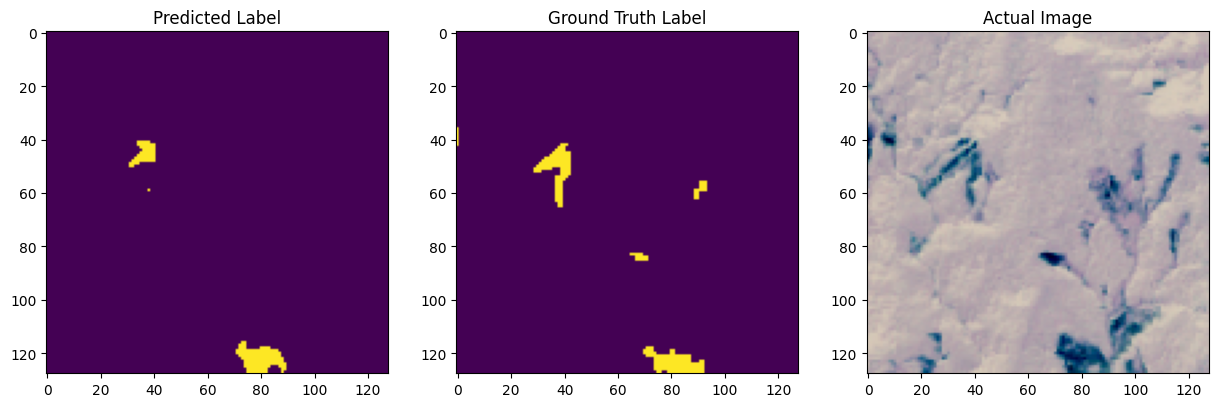

In [ ]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))

ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Actual Image')
ax2.imshow(y_valid[img,: ,:,0])
ax2.set_title("Ground Truth Label")
ax1.imshow(pred_img[img, :, :,0])
ax1.set_title("Predicted Label")


In [ ]:
print("Unique values in ground truth label:", np.unique(y_valid[img, :, :, 0]))


Unique values in ground truth label: [0. 1.]


In [ ]:
non_blank_indices = [i for i in range(len(y_valid)) if np.max(y_valid[i, :, :, 0]) > 0]
print("First 5 non-blank masks:", non_blank_indices[:5])


First 5 non-blank masks: [0, 1, 4, 5, 9]


Text(0.5, 1.0, 'Predicted Label')

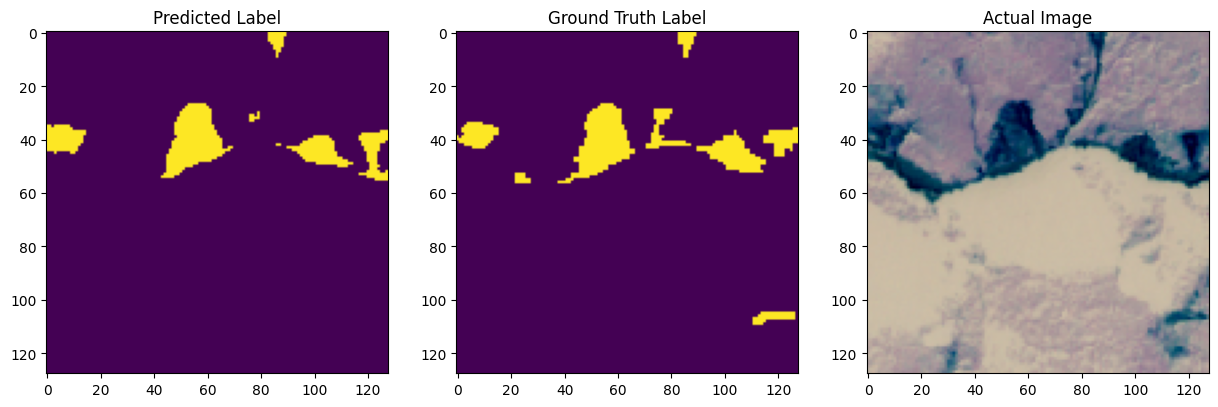

In [ ]:
img = 150
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))

ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Actual Image')
ax2.imshow(y_valid[img,: ,:,0])
ax2.set_title("Ground Truth Label")
ax1.imshow(pred_img[img, :, :,0])
ax1.set_title("Predicted Label")


In [ ]:
non_blank_indices = [i for i in range(len(y_valid)) if np.max(y_valid[i, :, :, 0]) > 0]
print("Indices with non-blank ground truth labels:", non_blank_indices[:10])


Indices with non-blank ground truth labels: [0, 1, 4, 5, 9, 10, 14, 16, 17, 19]


Text(0.5, 1.0, 'Predicted Label')

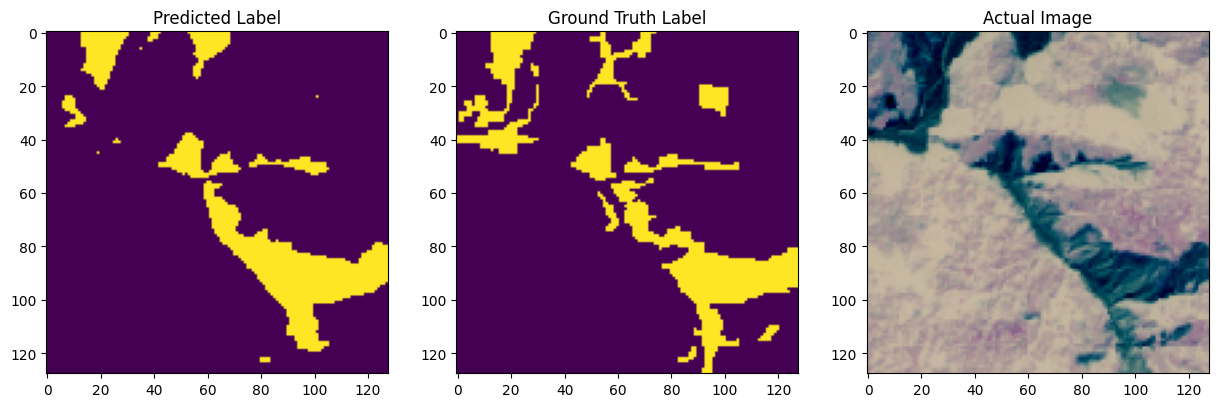

In [ ]:
img = 4
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Actual Image')
ax2.imshow(y_valid[img,: ,:,0])
ax2.set_title("Ground Truth Label")
ax1.imshow(pred_img[img, :, :,0])
ax1.set_title("Predicted Label")

Text(0.5, 1.0, 'Predicted Label')

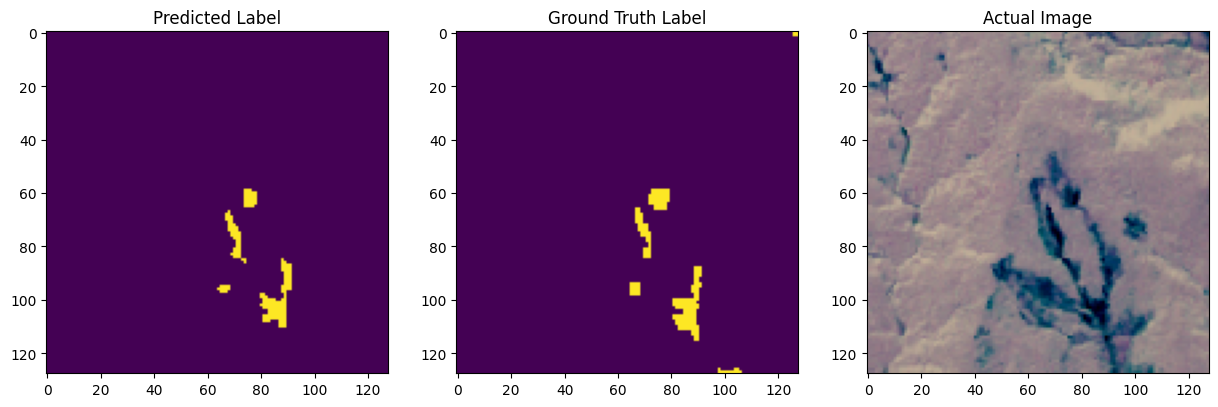

In [ ]:
img = 20
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Actual Image')
ax2.imshow(y_valid[img,: ,:,0])
ax2.set_title("Ground Truth Label")
ax1.imshow(pred_img[img, :, :,0])
ax1.set_title("Predicted Label")

In [ ]:
print(np.unique(y_valid[155]))


[0. 1.]


In [ ]:
print(np.sum(x_valid[155]))  # Total sum of pixel values
print(x_valid[155][0, 0, :]) # First pixel RGB values


27618.70812441561
[ 0.70506108  0.65862912  0.68249983  0.3482322   0.04       -0.68666667]


In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))
    inputs = tf.keras.layers.Lambda(lambda x: x / 255.0)(inputs)  # Normalize inputs

    # Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model2 = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    return model2


In [ ]:
model2 = unet_model(128, 128, 6)

# Define the ModelCheckpoint callback with the correct file extension
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_model.keras",  # Updated to `.keras`
    monitor="val_f1_m",          # Monitor validation F1 metric
    verbose=1,
    save_best_only=True,
    mode="max"
)

# Optional early stopping (uncomment if needed)
# earlyStopping = tf.keras.callbacks.EarlyStopping(
#     monitor="val_f1_m",
#     patience=10,
#     verbose=1,
#     mode="max"
# )

callbacks = [
    # earlyStopping,  # Uncomment if using early stopping
    checkpointer
]

# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=16,
    epochs=100,
    verbose=2,
    validation_data=(x_valid, y_valid),
    callbacks=callbacks
)

# Save the final model
model.save("unet_model_save.keras")  # Updated to `.keras`


Epoch 1/100

Epoch 1: val_f1_m improved from -inf to 0.72042, saving model to best_model.keras
190/190 - 116s - 609ms/step - accuracy: 0.9892 - dice_coefficient: 0.7395 - f1_m: 0.7525 - loss: 0.3021 - precision_m: 0.7541 - recall_m: 0.7606 - val_accuracy: 0.9885 - val_dice_coefficient: 0.7091 - val_f1_m: 0.7204 - val_loss: 0.3364 - val_precision_m: 0.7389 - val_recall_m: 0.7106
Epoch 2/100

Epoch 2: val_f1_m did not improve from 0.72042
190/190 - 125s - 657ms/step - accuracy: 0.9892 - dice_coefficient: 0.7414 - f1_m: 0.7543 - loss: 0.3005 - precision_m: 0.7556 - recall_m: 0.7632 - val_accuracy: 0.9882 - val_dice_coefficient: 0.7036 - val_f1_m: 0.7144 - val_loss: 0.3415 - val_precision_m: 0.7297 - val_recall_m: 0.7087
Epoch 3/100

Epoch 3: val_f1_m did not improve from 0.72042
190/190 - 142s - 749ms/step - accuracy: 0.9894 - dice_coefficient: 0.7441 - f1_m: 0.7568 - loss: 0.2967 - precision_m: 0.7596 - recall_m: 0.7625 - val_accuracy: 0.9880 - val_dice_coefficient: 0.7087 - val_f1_m: 0.

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

In [ ]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

In [ ]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')